## Section 3: Regression & Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Logistic Regression from SKLearn
from sklearn.linear_model import LogisticRegression

#Decision Tree from SKLearn
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import graphviz
import pydot

#train and tests spliting
from sklearn.model_selection import train_test_split

#metrics for the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
LDF = pd.read_csv('LDF')

### Logistic Regression

In [4]:
LDF.columns

Index(['net_profit/total_assets', 'total liabilities / total assets',
       'working capital / total assets',
       'current assets / short-term liabilities',
       '[(cash + short-term securities + receivables-short-term liabilities) / (operating expenses - depreciation)] * 365',
       'retained earnings / total assets', 'EBIT / total assets',
       'book value of equity / total liabilities', 'sales / total assets',
       'equity / total assets',
       '(gross profit + extraordinary items + financial expenses) / total assets',
       'gross profit / short-term liabilities',
       '(gross profit + depreciation) / sales',
       '(gross profit + interest) / total assets',
       '(total liabilities * 365) / (gross profit + depreciation)',
       '(gross profit + depreciation) / total liabilities',
       'total assets / total liabilities', 'gross profit / total assets',
       'gross profit / sales', '(inventory * 365) / sales',
       'sales (n) / sales (n-1)',
       'profit o

In [5]:
y = LDF['bankruptcy']
y = np.array(y)

In [6]:
X1 = np.array(LDF['total costs /total sales']).reshape(-1,1)
X2 = np.array(LDF['retained earnings / total assets']).reshape(-1,1)
X3 = np.array(LDF['working capital']).reshape(-1,1)

X4 = np.array(LDF['EBITDA (profit on operating activities - depreciation) / sales']).reshape(-1,1)

#having an issue using multiple

In [7]:
X1
X2
X3
X4

array([[ 0.11085 ],
       [ 0.13961 ],
       [ 0.22293 ],
       ...,
       [ 0.08437 ],
       [-0.20497 ],
       [-0.068474]])

In [8]:
clf1 = LogisticRegression().fit(X1,y)
clf2 = LogisticRegression().fit(X2,y)
clf3 = LogisticRegression().fit(X3,y)
clf4 = LogisticRegression().fit(X4,y)


In [9]:
LDF['working capital'].count()

43405

In [10]:
LDF['retained earnings / total assets'].count()

43405

In [11]:
LDF['total costs /total sales'].count()

43405

In [12]:
XC = LDF[['working capital','retained earnings / total assets','total costs /total sales']]

clf5 = LogisticRegression().fit(XC,y)
clf5.predict(XC)
print(clf5.score(XC,y))

0.9517567100564451


In [13]:
clf1.predict(X1)
clf2.predict(X2)
clf3.predict(X3)

clf4.predict(X4)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
print(clf1.score(X1,y))
print(clf2.score(X2,y))
print(clf3.score(X3,y))

print(clf4.score(X4,y))

0.9518258265176823
0.9518488653380947
0.9517336712360327
0.9518258265176823


### Decision Tree

In [15]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [16]:
#LDF['bankruptcy'].replace(0,"Not Bankrupt", inplace = True)
#LDF['bankruptcy'].replace(1,"Bankrupt", inplace = True)

In [17]:
X = LDF.iloc[:,0:64]
y = LDF['bankruptcy']

In [18]:
def DecisionTree(ssplit, tsize, depth):
    
    #splits data into train & test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = tsize, random_state=26)
    
    #sets tree guidelines
    clf = tree.DecisionTreeClassifier(min_samples_split=ssplit, max_depth = depth)
    
    #trains off of train set
    clf = clf.fit(X_train, y_train)
    
    #compares to test set
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_pred,y_test))
    return plot_cm(y_pred, y_test)

#### Comparing Results for: sample_split Changes (best: 3)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8499
           1       0.38      0.92      0.54       182

    accuracy                           0.97      8681
   macro avg       0.69      0.94      0.76      8681
weighted avg       0.99      0.97      0.97      8681



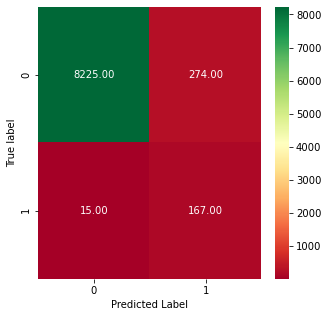

In [19]:
#best sample_split results (3)
DecisionTree(3, 0.2, 6)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8497
           1       0.38      0.91      0.53       184

    accuracy                           0.97      8681
   macro avg       0.69      0.94      0.76      8681
weighted avg       0.98      0.97      0.97      8681



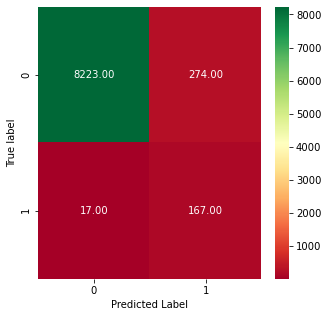

In [20]:
DecisionTree(5, 0.2, 6)

#### Comparing Results for: Test Size Changes (best: 0.2)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8499
           1       0.38      0.92      0.54       182

    accuracy                           0.97      8681
   macro avg       0.69      0.94      0.76      8681
weighted avg       0.99      0.97      0.97      8681



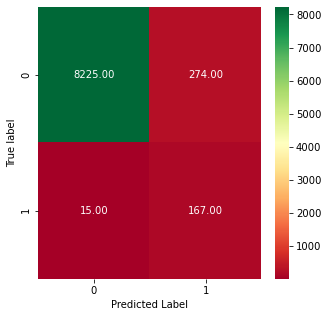

In [21]:
DecisionTree(3, 0.2, 6)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     10591
           1       0.38      0.81      0.52       261

    accuracy                           0.96     10852
   macro avg       0.69      0.89      0.75     10852
weighted avg       0.98      0.96      0.97     10852



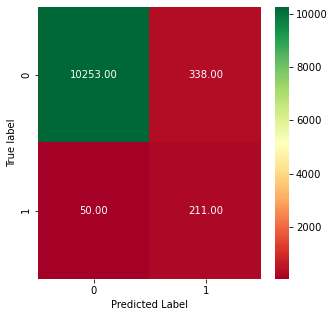

In [22]:
DecisionTree(3, 0.25, 6)

#### Comparing Results for: Depth Changes (best: 4)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8526
           1       0.33      0.94      0.49       155

    accuracy                           0.96      8681
   macro avg       0.66      0.95      0.73      8681
weighted avg       0.99      0.96      0.97      8681



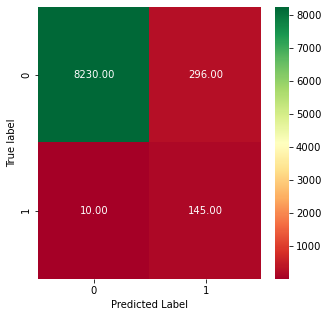

In [23]:
DecisionTree(3, 0.2, 4)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8483
           1       0.41      0.90      0.56       198

    accuracy                           0.97      8681
   macro avg       0.70      0.94      0.77      8681
weighted avg       0.98      0.97      0.97      8681



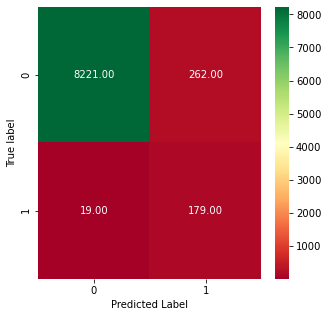

In [24]:
DecisionTree(3, 0.2, 7)

### Best Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8526
           1       0.33      0.94      0.49       155

    accuracy                           0.96      8681
   macro avg       0.66      0.95      0.73      8681
weighted avg       0.99      0.96      0.97      8681



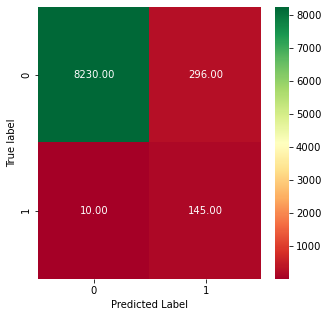

In [25]:
DecisionTree(3, 0.2, 4)

#### pdf of Decision Tree

In [26]:
class_names = ("bankrupt","not bankrupt")

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=26)
    
#sets tree guidelines
clf = tree.DecisionTreeClassifier(min_samples_split=3, max_depth = 4)
    
#trains off of train set
clf = clf.fit(X_train, y_train)

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,
                                class_names=class_names,
                                filled=True, 
                                rounded=True,
                                label='all',
                                special_characters=True,
                                proportion=False,
                                rotate=False)

graph = graphviz.Source(dot_data)
graph.render("bankruptDecisionTree")

'bankruptDecisionTree.pdf'

### Random Forest

In [29]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')




In [30]:
X = LDF.iloc[:,0:64]
y = LDF['bankruptcy']

In [31]:
def RandomForest(tsize, n_est, criteria):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=26)
    
    y_train.shape
    
    clff = RandomForestClassifier(n_estimators= n_est,
                            criterion= criteria)
    clff.fit(X_train,np.ravel(y_train))
    
    y_pred = clff.predict(X_test)
    
    print(classification_report(y_pred,y_test))
    return plot_cm(y_pred, y_test)

#### Comparing Results for: Test Size Changes (best: 0.15)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8494
           1       0.39      0.91      0.54       187

    accuracy                           0.97      8681
   macro avg       0.69      0.94      0.76      8681
weighted avg       0.98      0.97      0.97      8681



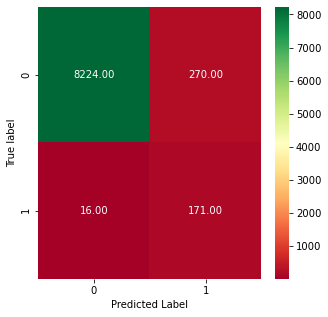

In [47]:
RandomForest(0.1, 17, 'entropy')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8490
           1       0.39      0.91      0.55       191

    accuracy                           0.97      8681
   macro avg       0.70      0.94      0.77      8681
weighted avg       0.98      0.97      0.97      8681



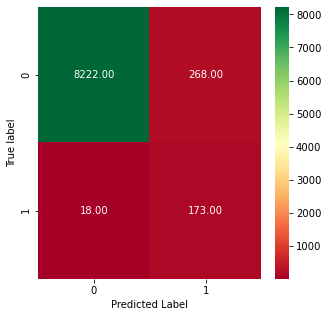

In [50]:
RandomForest(0.15, 17, 'entropy')

#### Comparing Results for: Number of Estimators (best: 18)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8530
           1       0.31      0.91      0.47       151

    accuracy                           0.96      8681
   macro avg       0.66      0.94      0.72      8681
weighted avg       0.99      0.96      0.97      8681



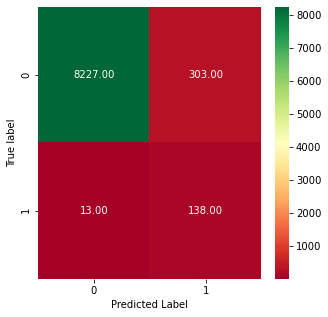

In [81]:
RandomForest(0.15, 18, 'entropy')

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8528
           1       0.31      0.90      0.46       153

    accuracy                           0.96      8681
   macro avg       0.66      0.93      0.72      8681
weighted avg       0.99      0.96      0.97      8681



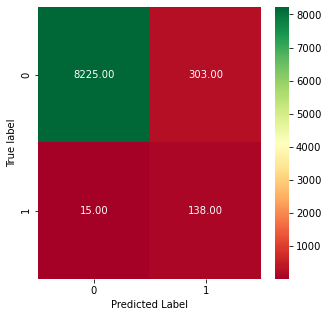

In [84]:
RandomForest(0.15, 10, 'entropy')

#### Comparing Results for Type: Entropy vs Gini

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8531
           1       0.31      0.92      0.47       150

    accuracy                           0.96      8681
   macro avg       0.66      0.94      0.72      8681
weighted avg       0.99      0.96      0.97      8681



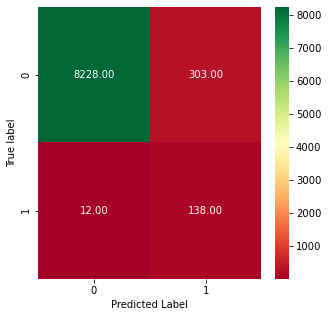

In [88]:
RandomForest(0.15, 18, 'entropy')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8507
           1       0.35      0.89      0.50       174

    accuracy                           0.96      8681
   macro avg       0.67      0.93      0.74      8681
weighted avg       0.98      0.96      0.97      8681



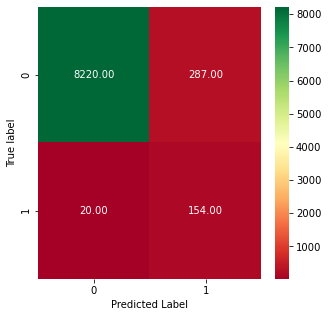

In [89]:
RandomForest(0.15, 18, 'gini')

### Best Random Forest 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8526
           1       0.32      0.92      0.48       155

    accuracy                           0.96      8681
   macro avg       0.66      0.94      0.73      8681
weighted avg       0.99      0.96      0.97      8681



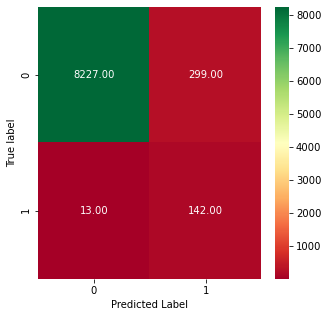

In [92]:
RandomForest(0.15, 18, 'entropy')